In [ ]:
##This dataset is from picklesueat, and contains more than 2000 job listings for data analyst positions, along with detailed information about these positions. The link is [https://www.kaggle.com/datasets/andrewmvd/data-analyst-jobs/data](https://www.kaggle.com/datasets/andrewmvd/data-analyst-jobs/data).

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [3]:
data_analyst = pd.read_csv('DataAnalyst.csv')

In [4]:
# Rename columns for clarity
columns_to_rename = {
    "Job Title": "job_title", 
    "Salary Estimate": "salary_estimate", 
    "Job Description": "job_description", 
    "Company Name": "company_name", 
    "Location": "location", 
    "Headquarters": "headquarters", 
    "Size": "size", 
    "Type of ownership": "type_of_ownership", 
    "Industry": "industry", 
    "Sector": "sector", 
    "Revenue": "revenue", 
    "Easy Apply": "easy_apply"
}
data_analyst.rename(columns=columns_to_rename, inplace=True)

In [5]:
# Simplify job titles to avoid duplicates
job_title_replacements = {
    'Sr. Data Analyst|sr. data analyst|Sr Data Analyst|sr data analyst|senior data analyst|Senior Data Analyst|Data Analyst III|data analyst iii': 'Senior Data Analyst',
    'Data Analyst I|data analyst i|Data Analyst Junior|data analyst junior|Junior Data Analyst|Junior Data AnalystI|Junior Data Analystl': 'Junior Data Analyst',
    'Data Analyst II|data analyst ii|Middle Data Analyst': 'Middle Data Analyst'
}
for pattern, replacement in job_title_replacements.items():
    data_analyst['job_title'] = data_analyst['job_title'].replace(pattern, replacement, regex=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16180\2702139412.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




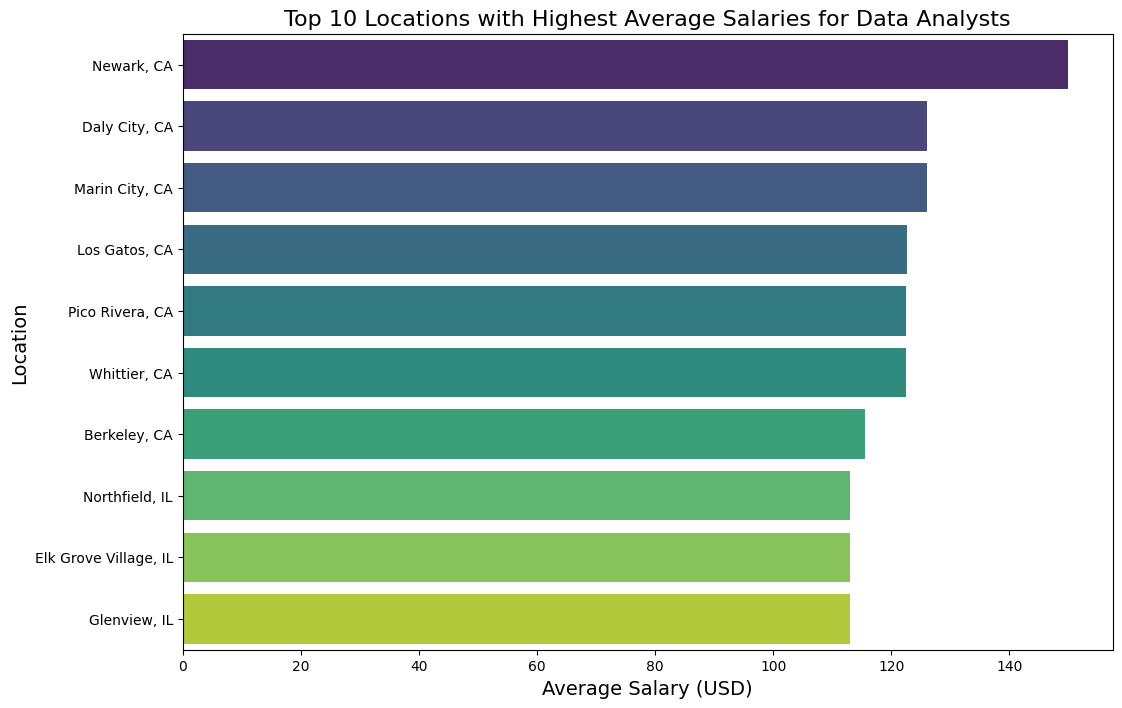

In [14]:
# Group by 'location' and calculate the mean of 'average_salary'
salary_by_location = data_analyst.groupby('location')['average_salary'].mean().reset_index()

# Sort the data to get the top 10 locations with the highest average salaries
top_10_locations = salary_by_location.sort_values(by='average_salary', ascending=False).head(10)

# Create a horizontal bar plot using seaborn
plt.figure(figsize=(12, 8))  # Increase figure size for better readability
barplot = sns.barplot(data=top_10_locations, x='average_salary', y='location', palette='viridis')

# Set plot titles and labels
plt.title('Top 10 Locations with Highest Average Salaries for Data Analysts', fontsize=16)
plt.xlabel('Average Salary (USD)', fontsize=14)
plt.ylabel('Location', fontsize=14)

# Display the plot
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16180\4131977089.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




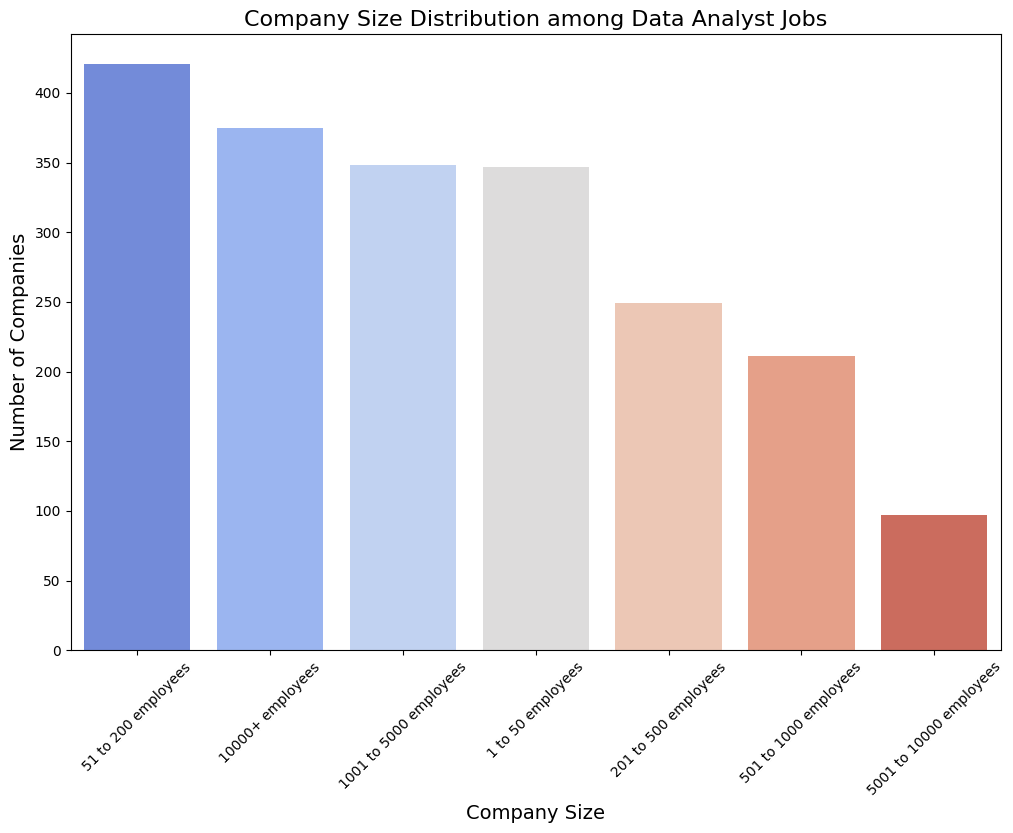

In [18]:
# Filter out rows where 'size' is '-1' or 'Unknown'
filtered_size = data_analyst[(data_analyst['size'] != '-1') & (data_analyst['size'] != 'Unknown')]

# Count occurrences of each size category
company_size_counts = filtered_size['size'].value_counts().head(20)

# Create a bar plot using seaborn with a distinct color palette
plt.figure(figsize=(12, 8))  # Adjust the figure size for better visibility
sns.barplot(x=company_size_counts.index, y=company_size_counts.values, palette='coolwarm')  # 'coolwarm' is a visually appealing diverging color palette

# Set plot titles and labels with enhanced formatting
plt.title('Company Size Distribution among Data Analyst Jobs', fontsize=16)
plt.xlabel('Company Size', fontsize=14)
plt.ylabel('Number of Companies', fontsize=14)
plt.xticks(rotation=45)  # Rotate the x-axis labels to avoid overlap and improve readability

# Display the plot
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16180\2592544668.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




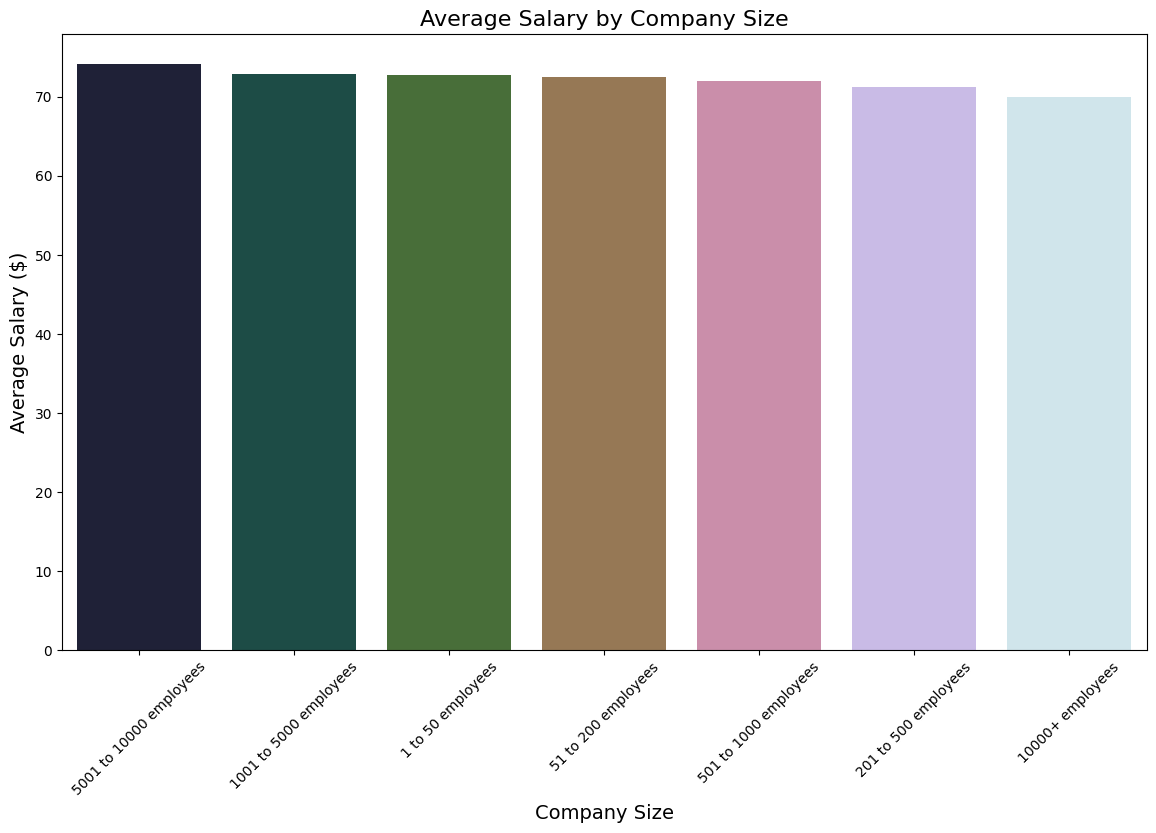

In [20]:
# Filter out entries where 'size' is '-1' or 'Unknown'
data_analyst_filtered = data_analyst[(data_analyst['size'] != '-1') & (data_analyst['size'] != 'Unknown')]

# Group by 'size' and calculate the mean of 'average_salary', then reset index for plotting
data_analyst_sizeXsalary = data_analyst_filtered.groupby('size')['average_salary'].mean().reset_index()

# Sort the DataFrame by 'average_salary' in descending order to display the highest salaries at the top
data_analyst_sizeXsalary = data_analyst_sizeXsalary.sort_values(by='average_salary', ascending=False)

# Create a bar plot with an updated color palette
plt.figure(figsize=(14, 8))  # Increased figure size for better display
sns.barplot(x='size', y='average_salary', data=data_analyst_sizeXsalary, palette='cubehelix')  # 'cubehelix' palette for a smooth color gradient

# Set plot titles and labels with enhanced formatting
plt.title('Average Salary by Company Size', fontsize=16)
plt.xlabel('Company Size', fontsize=14)
plt.ylabel('Average Salary ($)', fontsize=14)
plt.xticks(rotation=45)  # Adjust the x-axis labels to 45 degrees for better readability

# Display the plot
plt.show()